# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

160468.3
109482.07
de energie die naar het water is gegaan: 154528.87 J


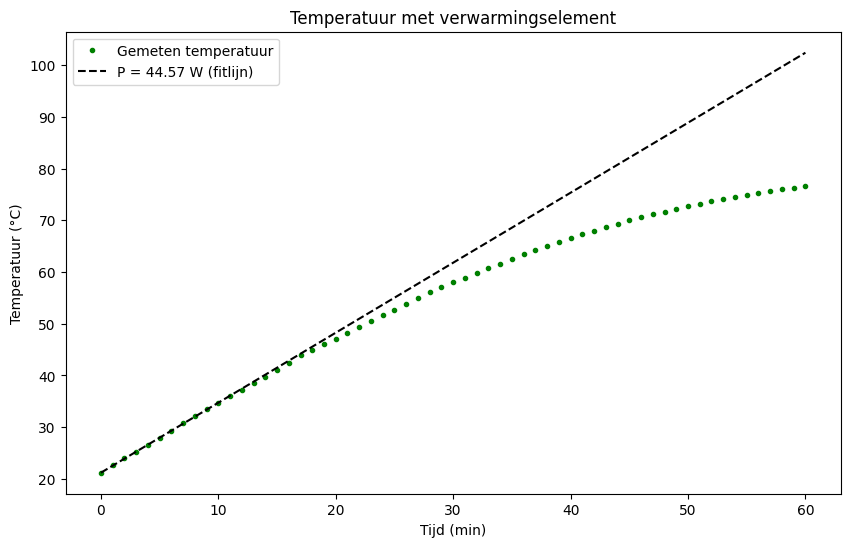

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

C_water = 4186 #J/kg°C
m_maatbekerwater_begin = 1292.9 #g
m_maatbekerwater_einde = 1274.9 #g
m_maatbeker= 820.8 #g
m_water= m_maatbekerwater_begin - m_maatbeker #g
m_water_verschil=m_maatbekerwater_begin - m_maatbekerwater_einde #g
m_water_kg= m_water_verschil/1000 #kg

E_waterdamp= 2502.6 * m_water_kg * 1000 #J

# Data
data = pd.read_csv('tempmetingen.csv',delimiter = ";")
tijd = data["t (min)"].to_numpy()
temperatuur = data["t (oC)"].to_numpy()

def function(t,P):
    return 21.2+(P*t*60)/(C_water*m_water/1000)

popt, cov = curve_fit(function, tijd[:5], temperatuur[:5])
x_test = np.linspace(0, 60, 500)
y_test = function(x_test, *popt)

E_in = popt[0] * 3600 #J
E_gekregen = (temperatuur[-1] - temperatuur[0])/(max(y_test)-temperatuur[0]) * E_in

E_verschil = E_gekregen + E_waterdamp
print(round(E_in,2))
print(round(E_gekregen,2))
print("de energie die naar het water is gegaan:", round(E_verschil,2), "J")

# Plotten 
plt.figure(figsize=(10, 6))
plt.plot(tijd, temperatuur, 'g.', label='Gemeten temperatuur')
plt.plot(x_test, y_test, 'k--', label='P = %.2f W (fitlijn)' % popt[0])

plt.xlabel('Tijd (min)')
plt.ylabel('Temperatuur (°C)')
plt.title('Temperatuur met verwarmingselement')

plt.legend()
plt.show()


In [28]:
# het thermodynamische proces zou nog verbeterd kunnen worden met bijvoorbeeld een deksel op de maatbeker met daarin een gat voor de sensor. Hierdoor is er minder warmteverlies en is de gevonde warmte die naar het water is gegaan nog accurater. 